<a href="https://colab.research.google.com/github/reeennico/Processamento-Digital-de-Sinais/blob/main/Cap_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 8: Projeto de Filtros IIR

## Resumo

Os filtros de Resposta ao Impulso Infinita (IIR) são amplamente empregados devido à sua eficiência computacional e capacidade de atender especificações utilizando um número reduzido de coeficientes. Diferente dos filtros FIR, os filtros IIR utilizam realimentação, o que pode gerar instabilidade caso o projeto não seja bem conduzido.

Os principais métodos para projetar filtros IIR incluem:
- **Aproximação de filtros analógicos (Butterworth, Chebyshev, Elíptico)**
- **Transformação bilinear**
- **Invariação do impulso**

---

## 1. Características dos Filtros IIR

Os filtros IIR possuem propriedades que os diferenciam dos FIR:

- **Baixa ordem necessária**: Conseguem atender às especificações desejadas com um número reduzido de coeficientes.
- **Risco de instabilidade**: Devido à realimentação, é essencial garantir que os polos estejam dentro do círculo unitário.
- **Resposta de fase não linear**: Pode resultar em distorção de fase, o que pode ser crítico para certas aplicações.

---

## 2. Tipos de Filtros IIR

Os filtros IIR são frequentemente obtidos a partir de versões analógicas, utilizando técnicas de discretização. Os principais tipos incluem:

### Filtro Butterworth

- Apresenta uma resposta de magnitude suave e progressiva.
- Não exibe ondulações na banda de passagem nem na banda de rejeição, garantindo uma resposta uniforme.


---

### Implementação em Python:


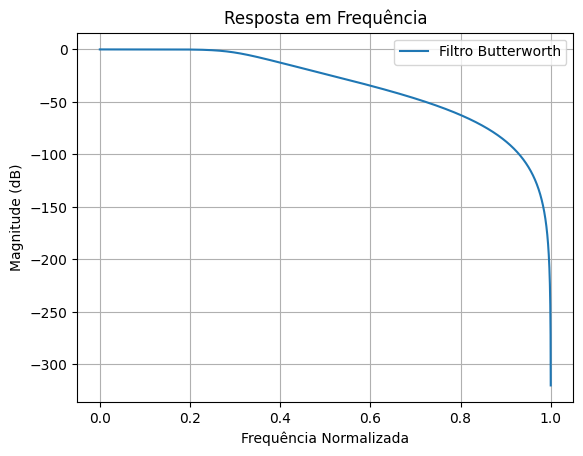

In [ ]:
from scipy.signal import butter, freqz
import numpy as np
import matplotlib.pyplot as plt

# Definição do filtro Butterworth
ordem = 4
cutoff = 0.3  # Frequência de corte normalizada
b, a = butter(ordem, cutoff, btype='low', analog=False)

# Resposta em frequência
w, h = freqz(b, a, worN=8000)

# Plotando a resposta
plt.figure()
plt.plot(w / np.pi, 20 * np.log10(abs(h)), label='Filtro Butterworth')
plt.title('Resposta em Frequência')
plt.xlabel('Frequência Normalizada')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()
plt.show()

### Filtro Chebyshev Tipo I

- Possui ondulações na banda de passagem, o que permite uma transição mais rápida entre as bandas.
- Apresenta melhor atenuação na banda de rejeição em comparação com o filtro Butterworth, tornando-o mais eficiente para certas aplicações.

---

### Implementação em Python:

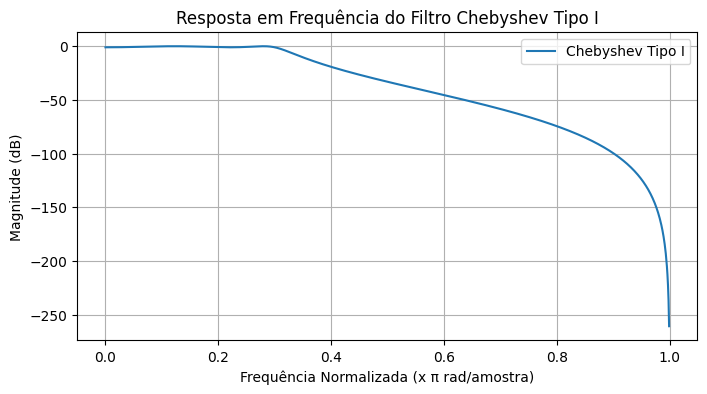

In [ ]:
from scipy.signal import cheby1

# Definição do filtro Chebyshev Tipo I
rp = 1  # Ripple máximo na banda de passagem (dB)
b, a = cheby1(ordem, rp, cutoff, btype='low', analog=False)

# Resposta em frequência
w, h = freqz(b, a, worN=1024)

# Plotando a resposta em frequência
plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, 20 * np.log10(abs(h)), label='Chebyshev Tipo I')
plt.title('Resposta em Frequência do Filtro Chebyshev Tipo I')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()
plt.show()

### Filtro Chebyshev Tipo II

- Diferente do Tipo I, possui uma resposta mais plana na banda de passagem.
- Apresenta ondulações na banda de rejeição, mas oferece uma atenuação mais controlada fora da banda de passagem.

---

### Implementação em Python:


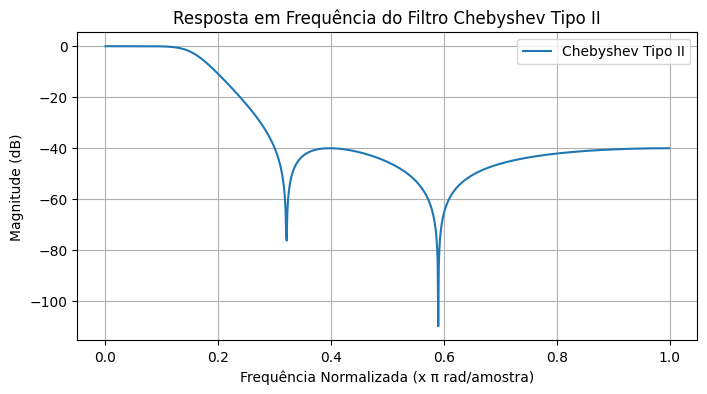

In [ ]:
from scipy.signal import cheby2

rs = 40  # Atenuação mínima na banda de rejeição (dB)
b, a = cheby2(ordem, rs, cutoff, btype='low', analog=False)

# Resposta em frequência
w, h = freqz(b, a, worN=1024)

# Plotando a resposta em frequência
plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, 20 * np.log10(abs(h)), label='Chebyshev Tipo II')
plt.title('Resposta em Frequência do Filtro Chebyshev Tipo II')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()
plt.show()

### Filtro Elíptico

- Oferece a menor ordem necessária para satisfazer uma determinada especificação.
- Possui ondulações tanto na banda de passagem quanto na banda de rejeição, proporcionando a melhor atenuação em comparação com os demais filtros IIR.


---

### Implementação em Python:


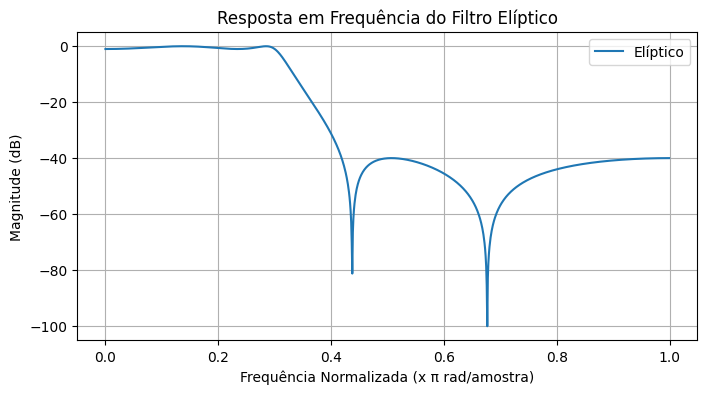

In [ ]:
from scipy.signal import ellip

rp = 1  # Ripple na banda de passagem
ts = 40  # Atenuação na banda de rejeição
b, a = ellip(ordem, rp, rs, cutoff, btype='low', analog=False)

# Resposta em frequência
w, h = freqz(b, a, worN=1024)

# Plotando a resposta em frequência
plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, 20 * np.log10(abs(h)), label='Elíptico')
plt.title('Resposta em Frequência do Filtro Elíptico')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()
plt.show()

## 3. Técnicas de Discretização
Os filtros IIR são derivados de modelos analógicos utilizando métodos de discretização. Os mais utilizados são:

### Transformação Bilinear
Converte a variável $$ s $$ em uma função de $$ z $$, garantindo que o eixo $$ j\omega $$ do domínio analógico seja mapeado corretamente para o círculo unitário no domínio discreto.


---

### Implementação em Python:


In [ ]:
from scipy.signal import bilinear

# Definição do sistema analógico
num = [1]
den = [1, 1]  # Função de transferência analógica
b, a = bilinear(num, den, fs=1.0)


### Invariação do Impulso
Este método discretiza um sistema analógico amostrando diretamente sua resposta ao impulso, preservando sua característica temporal original.

## 4. Comparação entre Filtros IIR
| Filtro               | Características |
|----------------------|--------------------------------------|
| Butterworth         | Transição suave, sem ondulações |
| Chebyshev I         | Alta atenuação, ondulação na banda de passagem |
| Chebyshev II        | Alta atenuação, ondulação na banda de rejeição |
| Elíptico            | Ordem mínima para atender às especificações |

---
## Conclusão
O projeto de filtros IIR proporciona soluções computacionalmente eficientes para filtragem digital, mas requer atenção especial à estabilidade e à resposta de fase. A escolha do filtro ideal depende das exigências específicas do problema e das restrições de implementação.

